In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as k

# to see the data plotted
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# hyperparameters + load data

# do not change unless train data changes
num_classes = 10

batch_size = 64
epochs = 24
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
# reshape data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [9]:
# convert type + scale train/val data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

print(f"x train shape: {x_train.shape}")
print(f"x test shape: {x_test.shape}")
print(y_train[0:3])

x train shape: (60000, 28, 28, 1)
x test shape: (10000, 28, 28, 1)
[9 0 0]


In [10]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:2]) # verify encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# MODEL CODE STARTS HERE

In [11]:
# define model
model = Sequential()

In [14]:
# create CNN
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [15]:
# define compile to minimize categorical loss, ada delta optimized, optimize to ensure max efficiency

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.AdamW(), metrics = ['accuracy']) # change optimizer to adam if problems occur

# train model and val the model after each epoch
# return history of loss/accuracy per epoch
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/24
938/938 [==============================] - 96s 101ms/step - loss: 1.1963 - accuracy: 0.5382 - val_loss: 0.6588 - val_accuracy: 0.7493
Epoch 2/24
938/938 [==============================] - 92s 98ms/step - loss: 0.5629 - accuracy: 0.7826 - val_loss: 0.5436 - val_accuracy: 0.7830
Epoch 3/24
938/938 [==============================] - 93s 99ms/step - loss: 0.4890 - accuracy: 0.8155 - val_loss: 0.4873 - val_accuracy: 0.8223
Epoch 4/24
938/938 [==============================] - 94s 100ms/step - loss: 0.4474 - accuracy: 0.8350 - val_loss: 0.4482 - val_accuracy: 0.8338
Epoch 5/24
938/938 [==============================] - 128s 137ms/step - loss: 0.4185 - accuracy: 0.8444 - val_loss: 0.4254 - val_accuracy: 0.8483
Epoch 6/24
938/938 [==============================] - 132s 141ms/step - loss: 0.3983 - accuracy: 0.8527 - val_loss: 0.4101 - val_accuracy: 0.8511
Epoch 7/24
938/938 [==============================] - 122s 130ms/step - loss: 0.3823 - accuracy: 0.8589 - val_loss: 0.3934 - val_a

Test loss: 0.3156927824020386
Test accuracy: 0.8866000175476074


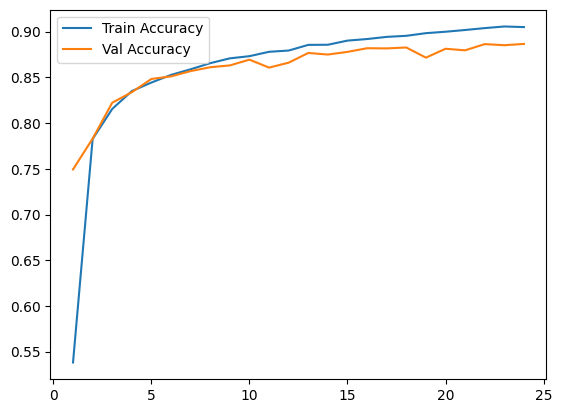

In [17]:
# evaluate model with test data to get metrics on real data
score = model.evaluate(x_test, y_test, verbose = 0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1)) # x axis
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Train Accuracy', 'Val Accuracy'))
plt.show()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0